# Visualisation on full charge density calculated with EMTO

In [657]:

import numpy as np
from scipy.io import FortranFile
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from itertools import product

#%matplotlib notebook
              

# Reading the unformatted fortran files

In [397]:
#list for sperical harmonics coefficients
chdl  = []
chd0  = []  
ri    = []

#read the unformatted FORTRAN file
f = FortranFile('chdlsoft.DNS','r')

#print all the "line" in the file
stop=True
i=1
while(stop):

    try:
        chdl.append(f.read_reals(dtype=np.float64))
    except:
        stop = False
    #print('read', i,'th set of chdl coefs')
    i+=1
f.close()

#read the unformatted FORTRAN file
f = FortranFile('r.DNS','r')

#print all the "line" in the file
stop=True
i=1
while(stop):

    try:
        ri.append(f.read_reals(dtype=np.float64))
    except:
        stop = False
    #print('read', i,'th set of ri')
    i+=1
f.close()

#read the unformatted FORTRAN file
f = FortranFile('chd0soft.DNS','r')

#print all the "line" in the file
stop=True
i=1
while(stop):

    try:
        chd0.append(f.read_reals(dtype=np.float64))
    except:
        stop = False
    #print('read', i,'th set of chd0 coefs')
    i+=1
f.close()



Check the size and chape of the inputted files to make sure they are okey

In [398]:

#for i in range(len(chdl)):
#    print(chdl[i][:])
#print(chdl)
print(ri[0][300])


print('number of chdl:', len(chdl))
print('lenght of chdl:', len(chdl[0]))

print('number of chd0:', len(chd0))
print('lenght of chd0:', len(chd0[0]))

0.5317225364432178
number of chdl: 49
lenght of chdl: 364
number of chd0: 81
lenght of chd0: 364


Plot the first component of the charge densities and distribution of R and how they add up.

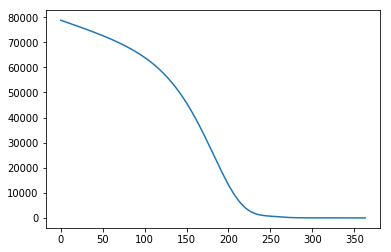

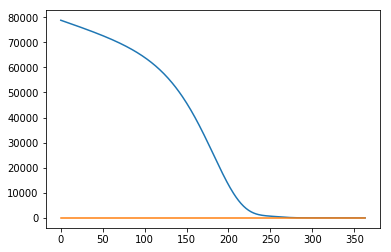

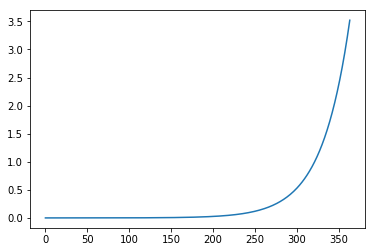

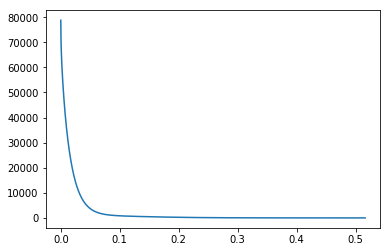

In [469]:

plt.plot(chdl[0])
plt.show()
plt.plot(chd0[0])
plt.plot(chdl[0]-chd0[0])
plt.show()
plt.plot(ri[0])
plt.show()
plt.plot(ri[0][000:300],chdl[0][00:300])
plt.show()

Generate the sets of l and m values for summation over L

In [402]:
Lms = []
for l in range(9):
    for m in range(-l,l+1):
        lm = l**2+l+m+1
        #print('l, m, L = {0:3} {1:3} {2:7}'.format(l, m, lm))
        Lms.append([l ,m])
#for lm in range(49):
    #print(Lms[lm])

Few functions to make the calculation of electron density a bit easier

In [449]:

from scipy.special import sph_harm

def real_harm(l,m,theta, phi):
    if m == 0:
        return np.real(sph_harm(m,l,phi,theta))
    elif m < 0:
        m = abs(m)
        return (-1)**m * np.sqrt(2) * np.imag(sph_harm(m,l,phi,theta))
    else:
        return (-1)**m * np.sqrt(2) * np.real(sph_harm(m,l,phi,theta))
def Phi(x,y):
    r = np.sqrt(x*x+y*y)
    if r == 0:
        return 0
    else:
        if y >=0:
            return np.arccos(x/r)
        else:
            return -np.arccos(x/r)
def find_nearest_index(array, value):
    array = np.asarray(array)
    #print((np.abs(array - value)))
    idx = (np.abs(array - value)).argmin()
    #print (idx)
    return idx

def radial_index(x,y):
    return (find_nearest_index(ri, np.sqrt(x*x+y*y)/365*3.5))

In [433]:
nq = 1 #ATOMIC SITE
#neglect the CPA's atomic site index number
nta = 1
ns = 1 #SPIN INDEX
nlmf = 49#number of spherical harmonics used in the expansion
nmax = 364 #number of mesh point
zFull = np.zeros((nmax*2,nmax*2))

#Loop over atomic sites
for iq in range(1,nq+1):
    #loop atomic site index
    for ita in range(1,nta+1):
        #loop spin index
        for iS in range(1,ns+1):
            #loop the sperical harmonics
            for lm in range(1,nlmf+1):
                for x in range(nmax*2):
                    X=x-nmax
                    for y in range(nmax*2):
                        Y=y-nmax
                        r=radial_index(X,Y)
                        if r>nmax:
                            r=nmax
                        zFull[x][y] += chdl[lm-1][(r)]*np.abs(real_harm(Lms[lm-1][0],Lms[lm-1][1],Phi(X,Y),0))
print(z)


KeyboardInterrupt: 

Calculation of electron density near a core, only done for one quater of the system to make it a little faster.

In [472]:
nq = 1 #ATOMIC SITE
#neglect the CPA's atomic site index number
nta = 1
ns = 1 #SPIN INDEX
nlmf = 49#number of spherical harmonics used in the expansion
nmax = 364 #number of mesh point
zQt = np.zeros((nmax,nmax))

#Loop over atomic sites
for iq in range(1,nq+1):
    #loop atomic site index
    for ita in range(1,nta+1):
        #loop spin index
        for iS in range(1,ns+1):
            #loop the sperical harmonics
            for lm in range(1,nlmf+1):
                for x in range(nmax):
                    X=x
                    for y in range(nmax):
                        Y=y
                        r=radial_index(X,Y)
                        if r>nmax:
                            r=nmax
                        zQt[x][y] += real_harm(
                                    Lms[lm-1][0],Lms[lm-1][1],
                                    Phi(X,Y),0)*chdl[lm-1][(r)]
print(zQt)

[[2.22247112e+04 1.02426874e+04 5.75583505e+03 ... 3.27646609e-02
  3.39414223e-02 3.39414223e-02]
 [1.02426874e+04 7.93894385e+03 4.98586230e+03 ... 3.27647180e-02
  3.39414787e-02 3.39414784e-02]
 [5.75583505e+03 4.98586230e+03 3.55209813e+03 ... 3.27648891e-02
  3.39416482e-02 3.39416469e-02]
 ...
 [3.27646609e-02 3.27647180e-02 3.27648891e-02 ... 3.57919197e-02
  3.57919055e-02 3.57918632e-02]
 [3.39414223e-02 3.39414787e-02 3.39416482e-02 ... 3.57919055e-02
  3.57919197e-02 3.57919056e-02]
 [3.39414223e-02 3.39414784e-02 3.39416469e-02 ... 3.57918632e-02
  3.57919056e-02 3.57919197e-02]]


Plotting of the electron density just calculated with few different coloring scales to give a bit more information.

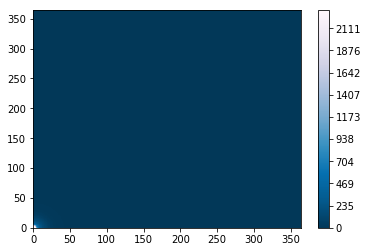

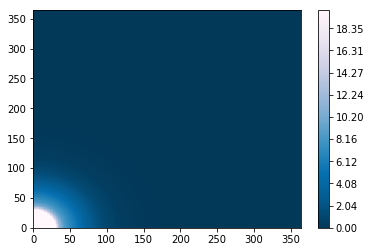

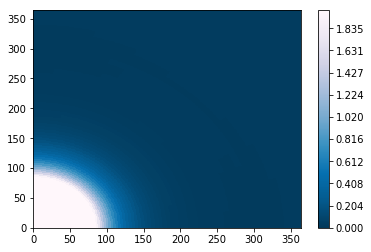

In [512]:
import matplotlib.colors as colors

#print(zQt[:10,:10])
#print(ri[0])
#print(np.min(zQt))
#print(np.mean(zQt))
bounds = np.linspace(0, 2300, 256)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(zQt[:,:], norm=norm,
                       cmap='PuBu_r')
plt.colorbar()#pcm, ax=ax[0], extend='max')
plt.show()

bounds = np.linspace(0, 20, 256)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(zQt[:,:], norm=norm,
                       cmap='PuBu_r')
plt.colorbar()#pcm, ax=ax[0], extend='max')
plt.show()

bounds = np.linspace(0, 2, 256)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(zQt[:,:], norm=norm,
                       cmap='PuBu_r')
plt.colorbar()#pcm, ax=ax[0], extend='max')
plt.show()


# Generating a 2D FCC lattice
Here is shown a way to generate a fcc latice an plot a charge density to this lattice and then do a 

In [943]:
#Few function to make thing easier

def ptpv(R):
    #method to project any dim(2) vector R  to components of
    #primitive vectors A1 and A1 
    n1 = np.dot(R,A1)/A1n
    n2 = np.dot(R,A2)/A2n
    return [n1,n2]
    
def mtfW(N,a):
    #map to the first Wigner seizt cell
    n1Wz = N[0]%1
    n2Wz = N[1]%1
    if np.abs(n1Wz) >0.5:
        #print('original',n1Wz)
        n1Wz = n1Wz-a
        #print ('sifted',n1Wz)
    if np.abs(n2Wz) >0.5:
        #print('original',n2Wz)
        n2Wz = n2Wz-a
        #print ('sifted',n2Wz)
        
    return[n1Wz,n2Wz]


In [944]:
#make a plotting for 2d grid

#Defining a 
A1 = np.array([1,1])
A2 = np.array([-1,1])
A1n = np.dot(A1,A1)
A2n = np.dot(A2,A2)
#size and accuracy parameters
a = 1
sizegrid = 10
acc = 1000


xgrid = np.linspace(-sizegrid*a,sizegrid*a, acc)
ygrid = np.linspace(-sizegrid*a,sizegrid*a, acc)
zvalues = np.zeros((len(xgrid),len(ygrid)))
for i in product(range(acc),range(acc)):
    xi,yi=i[0],i[1]
    x,y=xgrid[xi],ygrid[yi]
    R = [x,y]
    Rnorm = np.linalg.norm(R)
    #print('R vector')
    #print (R)
    #print('A1 and A2 projenction of R')
    N = ptpv(R)
    #print(N)
    #print('A1 and A1 parts in first Ws cell')
    fWcN = mtfW(N,a)
    #print (-np.linalg.norm(fWcN))
    zvalues[xi][yi]=1000*np.exp(-10*np.linalg.norm(fWcN))
    #print (Rnorm)
        

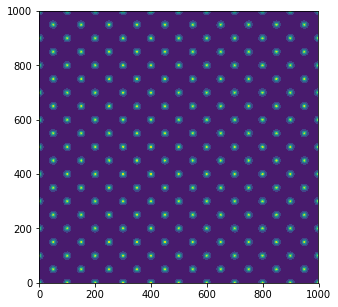

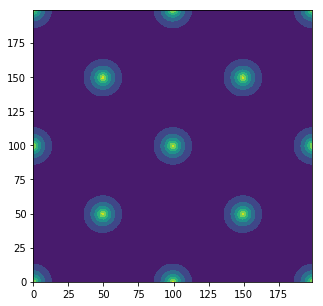

In [945]:
plt.show()
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
plot = ax.contourf(zvalues)#[200:300,200:300])
plt.show()


plt.show()
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
plot = ax.contourf(zvalues[400:600,400:600])
plt.show()

In [946]:
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

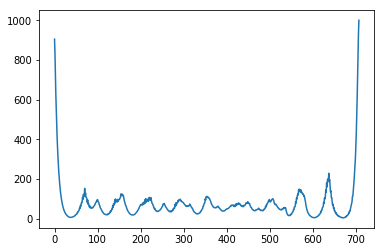

In [947]:
Rprofile = radial_profile(zvalues,[500,500])
plt.plot(Rprofile[:])
plt.show()

In [962]:
Rmax=(np.linalg.norm([sizegrid,sizegrid]))
Rimax=len(Rprofile)-1

zRvalues=zvalues.copy()
for i in product(range(acc),range(acc)):
    xi,yi=i[0],i[1]
    x,y=xgrid[xi],ygrid[yi]
    R = [x,y]
    Rnorm = np.linalg.norm(R) #np.dot(R,R)#
    Ri=int(Rnorm/Rmax*Rimax)
    zRvalues[xi,yi]=Rprofile[int(Ri)]
    #print (Rinorm)

Plotting the radial distribution to see how we managed

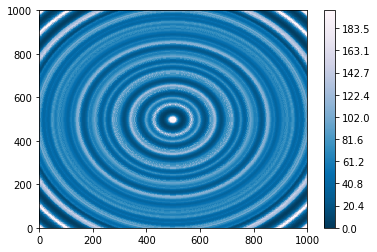

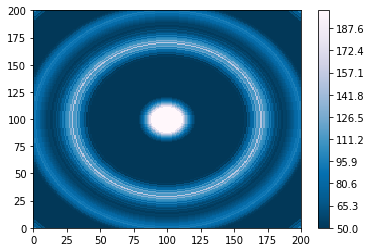

In [959]:
bounds = np.linspace(0, 200, 256)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(zRvalues[:,:], norm=norm,
                       cmap='PuBu_r')
plt.colorbar()#pcm, ax=ax[0], extend='max')
plt.show()

bounds = np.linspace(50, 200, 256)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(zRvalues[400:600,400:600], norm=norm,
                       cmap='PuBu_r')
plt.colorbar()#pcm, ax=ax[0], extend='max')
plt.show()

Comparison of radial distribution of original and radial data, to check that nothing failed

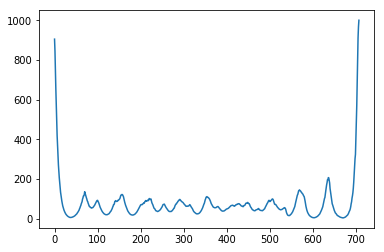

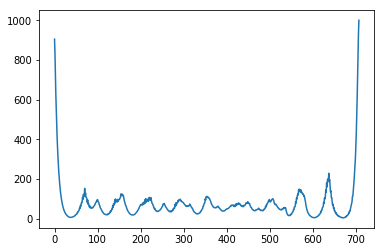

In [960]:
Rprofile = radial_profile(zRvalues,[500,500])
plt.plot(Rprofile[:])
plt.show()

Rprofile = radial_profile(zvalues,[500,500])
plt.plot(Rprofile[:])
plt.show()

# Generating a 3D FCC lattice 

In [1035]:
#Few function to make thing easier

def ptpv3d(R):
    #method to project any dim(2) vector R  to components of
    #primitive vectors A1 and A1 
    n1 = np.dot(R,A1)#/A1n
    n2 = np.dot(R,A2)#/A2n
    n3 = np.dot(R,A3)#/A3n
    return [n1,n2,n3]
    
def mtfW3d(N,a):
    #map to the first Wigner seitz cell
    n1Wz = N[0]%a
    n2Wz = N[1]%a
    n3Wz = N[2]%a
    if np.abs(n1Wz) >0.5:
        #print('original',n1Wz)
        n1Wz = n1Wz-a
        #print ('sifted',n1Wz)
    if np.abs(n2Wz) >0.5:
        #print('original',n2Wz)
        n2Wz = n2Wz-a
        #print ('sifted',n2Wz)
    if np.abs(n3Wz) >0.5:
        n3Wz = n3Wz-a
        
    return[n1Wz,n2Wz,n3Wz]


In [980]:
#make a plotting for 2d grid

#Defining a 
A1 = np.array([1,1,0])
A2 = np.array([0,1,1])
A3 = np.array([1,0,1])
A1n = np.linalg.norm(A1)
A2n = np.linalg.norm(A2)
A3n = np.linalg.norm(A3)
#size and accuracy parameters
a = 1
sizegrid = 10
acc = 500


xgrid = np.linspace(-sizegrid*a,sizegrid*a, acc)
ygrid = np.linspace(-sizegrid*a,sizegrid*a, acc)
zgrid = np.linspace(-sizegrid*a,sizegrid*a, acc)
pvalues = np.zeros((acc,acc,acc))
for i in product(range(acc),range(acc),range(acc)):
    xi,yi,zi=i[0],i[1],i[2]
    x,y,z=xgrid[xi],ygrid[yi], zgrid[zi]
    R = [x,y,z]
    Rnorm = np.linalg.norm(R)
    #print('R vector')
    #print (R)
    #print('A1 and A2 projenction of R')
    N = ptpv3d(R)
    #print(N)
    #print('A1 and A1 parts in first Ws cell')
    fWcN = mtfW3d(N,a)
    #print (-np.linalg.norm(fWcN))
    pvalues[xi][yi][zi]=1000*np.exp(-10*np.linalg.norm(fWcN))
    #print (Rnorm)
        

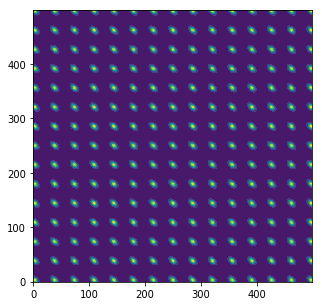

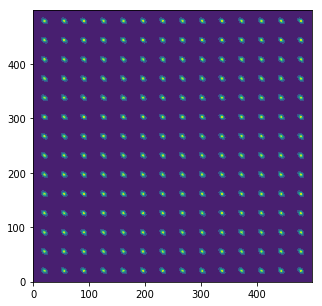

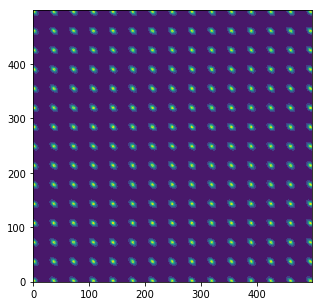

In [1031]:
for i in np.linspace(0,110,3):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    plot = ax.contourf(pvalues[int(i),:,:])
    plt.show()


In [1023]:
from mayavi import mlab
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.scatter(pvalues)

ModuleNotFoundError: No module named 'mayavi'

In [982]:
def radial_profile3d(data, center):
    y, x, z = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

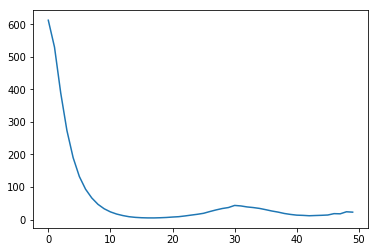

In [986]:
Rprofile = radial_profile3d(pvalues,[250,250,250])
plt.plot(Rprofile[:50])
plt.show()

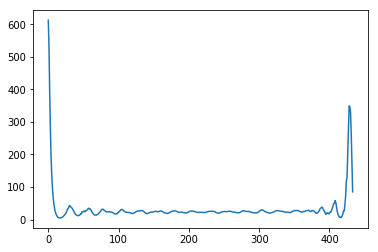

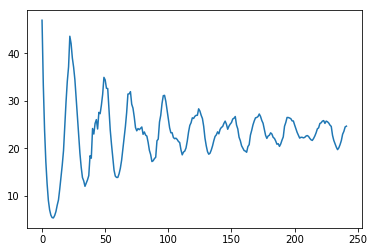

[612.08769884 529.49866289 389.06812995 273.44877081 190.23624469
 132.41822236  93.48475791  66.57951043  47.0040712   33.37513843]


In [1006]:
plt.plot(Rprofile[:])
plt.show()
plt.plot(Rprofile[8:250])
plt.show()
print(Rprofile[0:10])

In [1000]:
pRvalues=pvalues[0].copy()
Rmax=np.linalg.norm([sizegrid*a,sizegrid*a,sizegrid*a])
Rimax=len(Rprofile)-1
for i in product(range(acc),range(acc)):
    xi,yi=i[0],i[1]
    x,y=xgrid[xi],ygrid[yi]
    R = [x,y]
    Rnorm = np.linalg.norm(R) #np.dot(R,R)#
    Ri=int(Rnorm/Rmax*Rimax)
    pRvalues[xi,yi]=Rprofile[int(Ri)]
print (np.shape(Rprofile))

(434,)


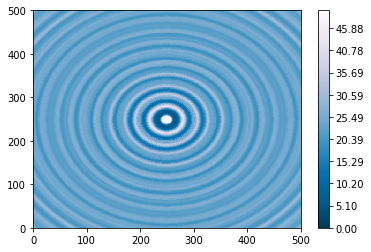

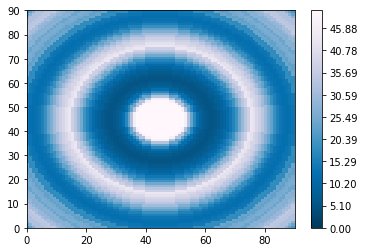

In [1005]:
bounds = np.linspace(0, 50, 256)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(pRvalues[:,:], norm=norm,
                       cmap='PuBu_r')
plt.colorbar()
plt.show()

bounds = np.linspace(0, 50, 256)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(pRvalues[205:295,205:295], norm=norm,
                       cmap='PuBu_r')
plt.colorbar()
plt.show()

In [992]:
print (pRvalues[245:255,245:255])

[[37.56891148 43.82108319 47.11637512 39.46702574 39.46702574 39.46702574
  39.46702574 47.11637512 43.82108319 37.56891148]
 [43.82108319 39.46702574 29.3008982  20.90566992 20.90566992 20.90566992
  20.90566992 29.3008982  39.46702574 43.82108319]
 [47.11637512 29.3008982  20.90566992 15.11334745 10.84214481 10.84214481
  15.11334745 20.90566992 29.3008982  47.11637512]
 [39.46702574 20.90566992 15.11334745  8.06096315  6.29820791  6.29820791
   8.06096315 15.11334745 20.90566992 39.46702574]
 [39.46702574 20.90566992 10.84214481  6.29820791  5.32448465  5.32448465
   6.29820791 10.84214481 20.90566992 39.46702574]
 [39.46702574 20.90566992 10.84214481  6.29820791  5.32448465  5.32448465
   6.29820791 10.84214481 20.90566992 39.46702574]
 [39.46702574 20.90566992 15.11334745  8.06096315  6.29820791  6.29820791
   8.06096315 15.11334745 20.90566992 39.46702574]
 [47.11637512 29.3008982  20.90566992 15.11334745 10.84214481 10.84214481
  15.11334745 20.90566992 29.3008982  47.11637512]


529.4986628878916


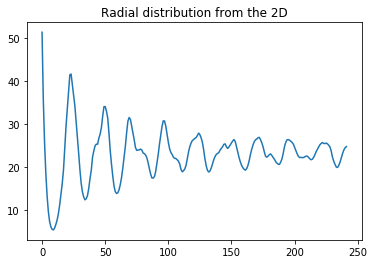

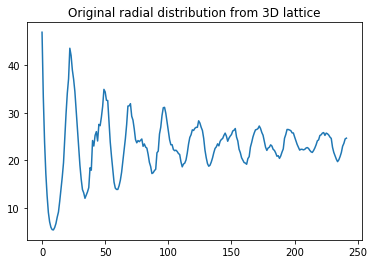

In [1020]:
R2Dprofile = radial_profile(pRvalues,[250,250])
plt.plot(R2Dprofile[8:250])
plt.title('Radial distribution from the 2D')
plt.show()

R3Dprofile = Rprofile# radial_profile3d(pvalues,[250,250,250])
plt.plot(Rprofile[8:250])
plt.title('Original radial distribution from 3D lattice')
plt.show()

# Comparision of 2D and 3D models

# Tryining of different ways to implement things.  End of the actuall file

In [1053]:
#Few function to make thing easier

def ptpvT(R):
    #method to project any dim(2) vector R  to components of
    #primitive vectors A1 and A1 
    n1 = np.dot(R,A1)/A1n
    n2 = np.dot(R,A2)/A2n
    n3 = np.dot(R,A3)/A3n
    return [n1,n2,n3]
    
def mtfWT(N,a):
    #map to the first Wigner seitz cell
    n1Wz = N[0]%(a*A1n)
    n2Wz = N[1]%(a*A2n)
    n3Wz = N[2]%(a*A3n)
    if np.abs(n1Wz) >0.5:
        #print('original',n1Wz)
        n1Wz = n1Wz-(a*A1n)
        #print ('sifted',n1Wz)
    if np.abs(n2Wz) >0.5:
        #print('original',n2Wz)
        n2Wz = n2Wz-(a*A2n)
        #print ('sifted',n2Wz)
    if np.abs(n3Wz) >0.5:
        n3Wz = n3Wz-(a*A2n)
        
    return[n1Wz,n2Wz,n3Wz]


In [1201]:
#make a plotting for 2d grid

#Defining a 
A1 = 0.5*np.array([0,1,1]) #fcc([0,1,1])#bcc([])#SC([1,0,0])
A2 = 0.5*np.array([1,0,1])
A3 = 0.5*np.array([1,1,0])
A=np.array([A1,A2,A3])
A1n = np.linalg.norm(A1)
A2n = np.linalg.norm(A2)
A3n = np.linalg.norm(A3)
#size and accuracy parameters
a = 2
sizegrid = 1
acc = 50


xgrid = np.linspace(-sizegrid*a,sizegrid*a, acc)
ygrid = np.linspace(-sizegrid*a,sizegrid*a, acc)
zgrid = np.linspace(-sizegrid*a,sizegrid*a, acc)
pvalues = np.zeros((acc,acc,acc))
for i in product(range(acc),range(acc),range(acc)):
    xi,yi,zi=i[0],i[1],i[2]
    x,y,z=xgrid[xi],ygrid[yi], zgrid[zi]
    R = [x,y,z]
    Rnorm = np.linalg.norm(R)
    #print('R vector')
    #print (R)
    #print('A1 and A2 projenction of R')
    N = np.linalg.solve(A,R)#ptpvT(R)
    #print(N)
    #print('A1 and A1 parts in first Ws cell')
    fWcN = mtfWT(N,a)
    #print (-np.linalg.norm(fWcN))
    if np.linalg.norm(fWcN) < 0.2:
        pvalues[xi][yi][zi]=  1
    else:
        pvalues[xi][yi][zi]=  0#print (Rnorm)
        

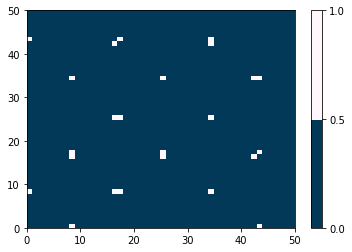

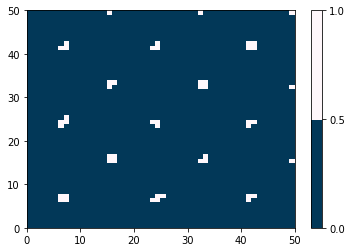

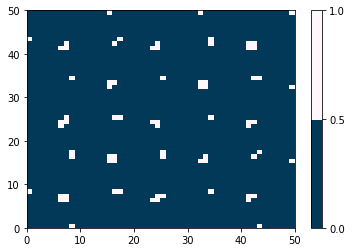

In [1218]:
ptest = pvalues[0]+pvalues[6]

#for i in np.linspace(0,7,2):
bounds = np.linspace(0, 1, 3)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(pvalues[0], norm=norm,
                   cmap='PuBu_r')

plt.colorbar()
plt.show()
bounds = np.linspace(0, 1, 3)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(pvalues[6], norm=norm,
                   cmap='PuBu_r')

plt.colorbar()
plt.show()
bounds = np.linspace(0, 1, 3)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(ptest, norm=norm,
                   cmap='PuBu_r')

plt.colorbar()
plt.show()

/home/ilkka/anaconda2/envs/py36tf/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


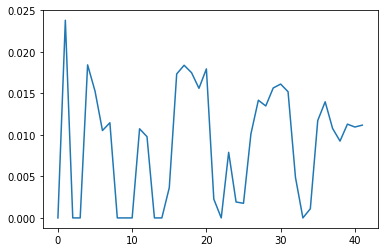

In [1219]:
Rprofile = radial_profile3d(pvalues,[50,50,50])
plt.plot(Rprofile[8:50])
plt.show()

In [1165]:
pRvalues=pvalues[0].copy()
Rmax=np.linalg.norm([sizegrid*a,sizegrid*a,sizegrid*a])
Rimax=len(Rprofile)-1
for i in product(range(acc),range(acc)):
    xi,yi=i[0],i[1]
    x,y=xgrid[xi],ygrid[yi]
    R = [x,y]
    Rnorm = np.linalg.norm(R) #np.dot(R,R)#
    Ri=int(Rnorm/Rmax*Rimax)
    pRvalues[xi,yi]=Rprofile[int(Ri)]
print (np.shape(Rprofile))

(87,)


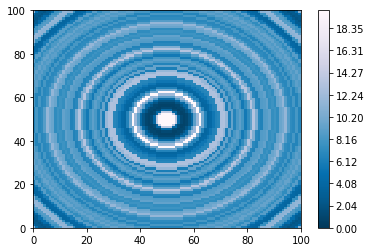

In [1167]:
bounds = np.linspace(0, 20, 256)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(pRvalues[:,:], norm=norm,
                       cmap='PuBu_r')
plt.colorbar()
plt.show()

In [ ]:
bounds = np.linspace(0, 50, 256)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.pcolormesh(pRvalues[:,:], norm=norm,
                       cmap='PuBu_r')
plt.colorbar()
plt.show()

added


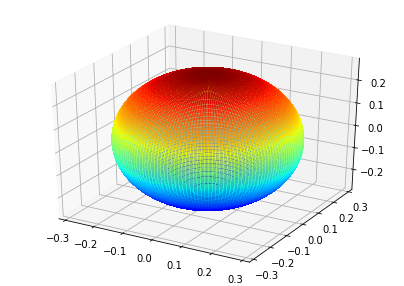

radial part


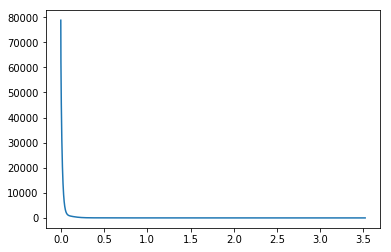

added


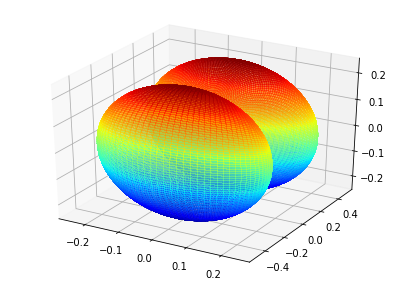

radial part


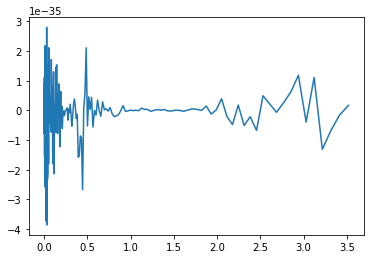

added


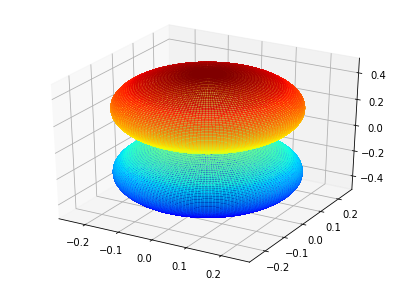

radial part


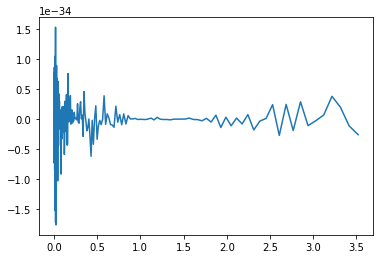

added


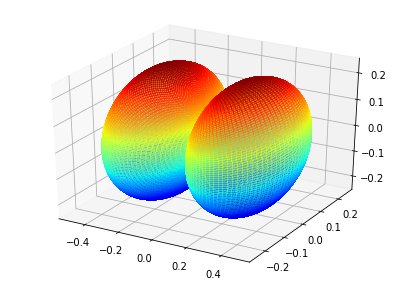

radial part


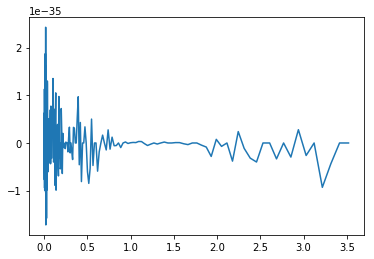

added


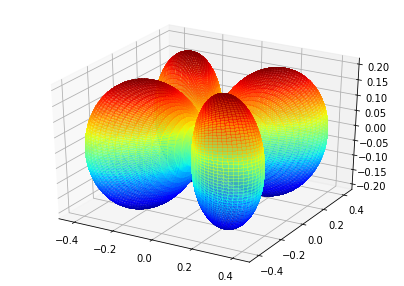

radial part


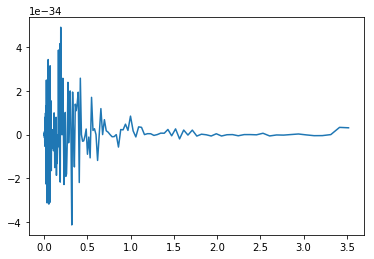

added


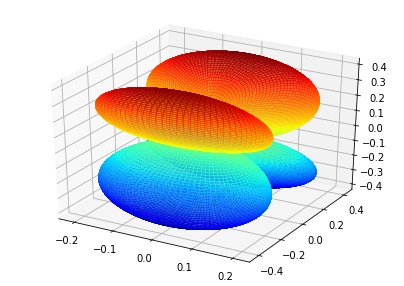

radial part


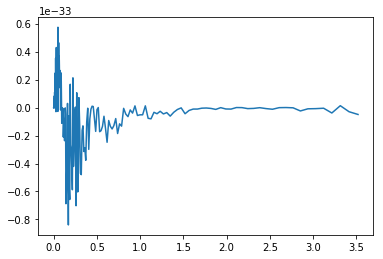

added


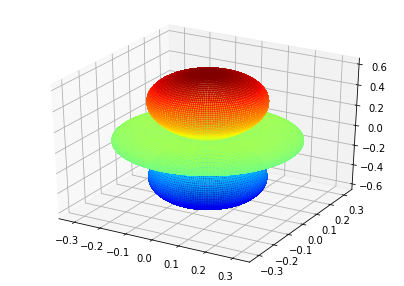

radial part


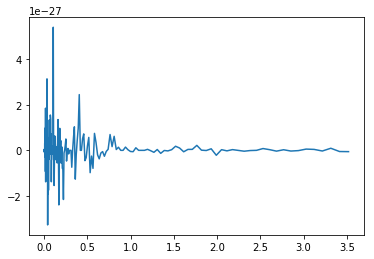

added


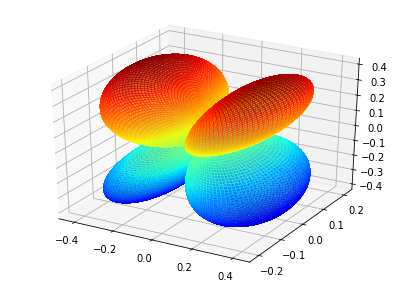

radial part


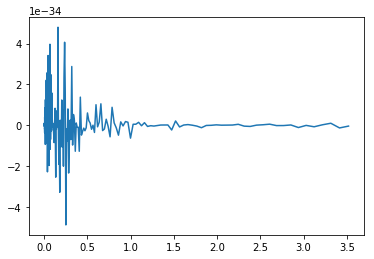

added


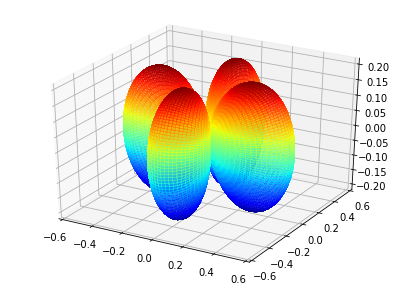

radial part


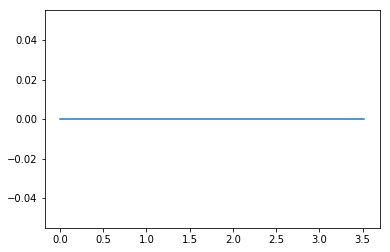

added


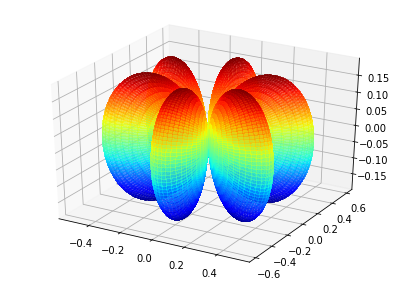

radial part


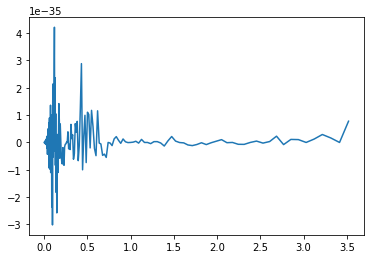

added


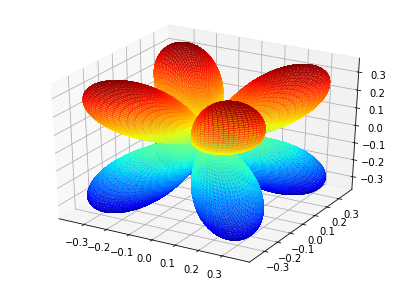

radial part


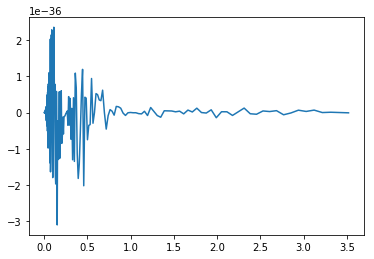

added


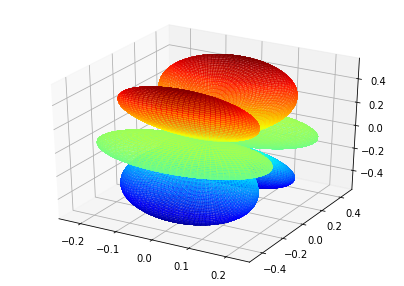

radial part


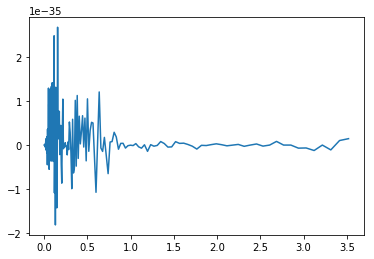

added


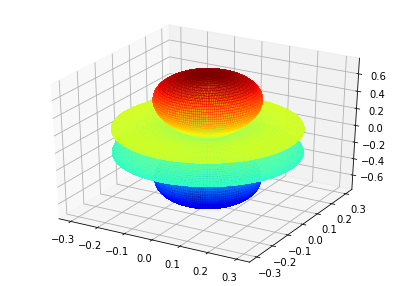

radial part


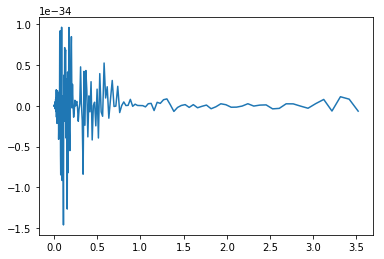

added


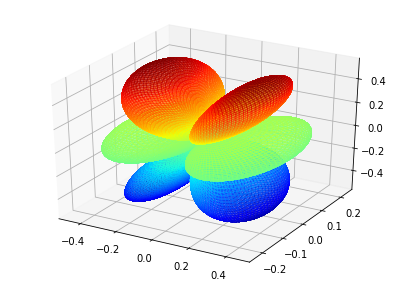

radial part


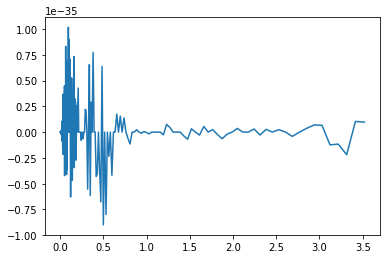

added


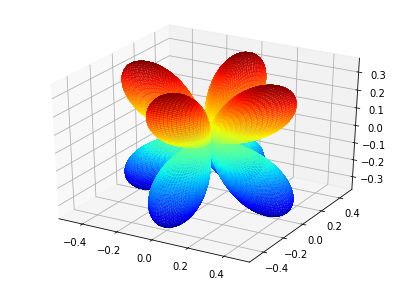

radial part


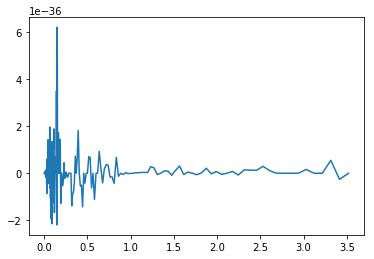

added


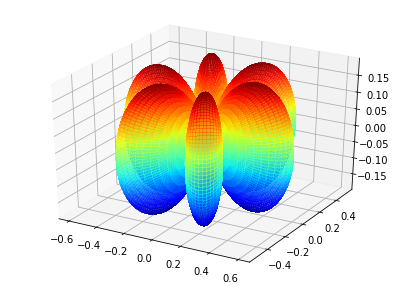

radial part


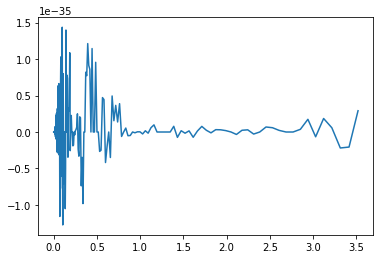

added


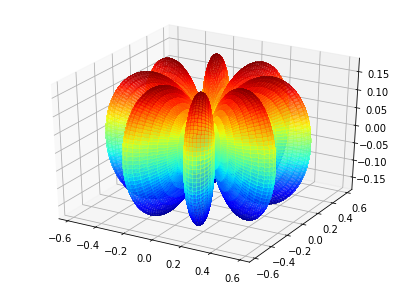

radial part


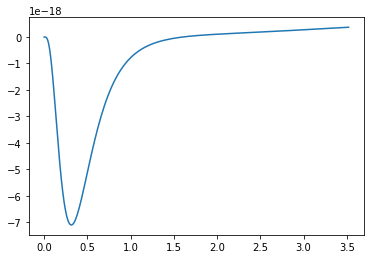

added


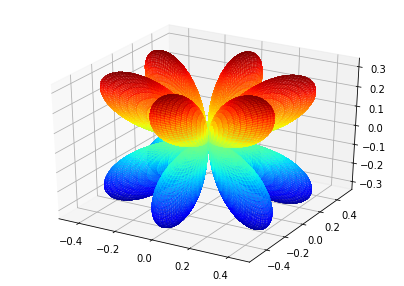

radial part


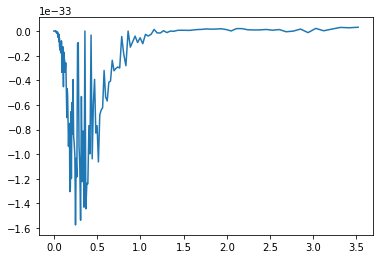

added


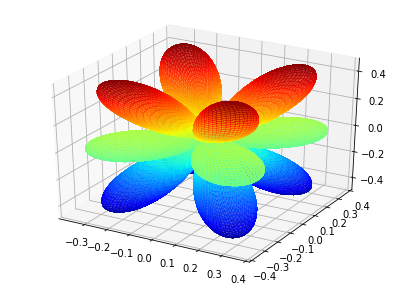

radial part


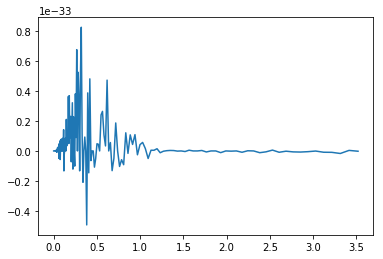

added


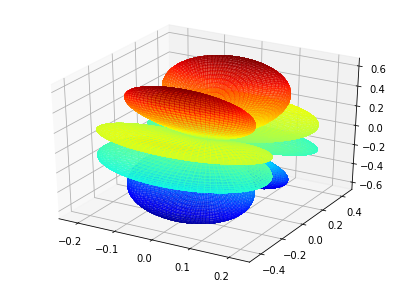

radial part


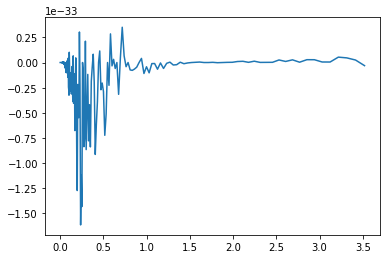

added


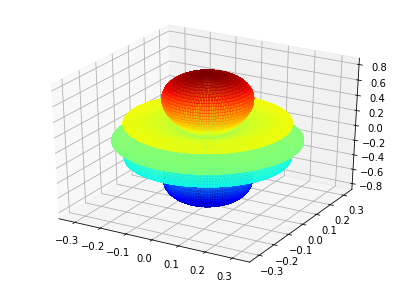

radial part


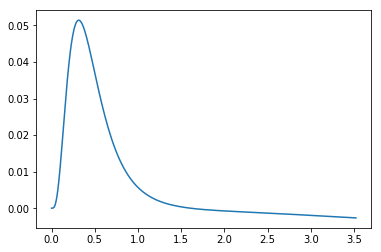

added


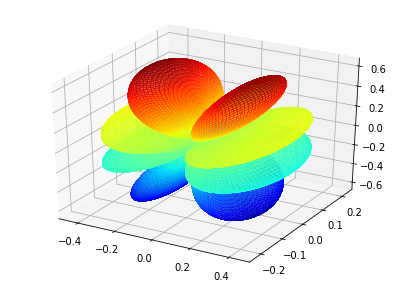

radial part


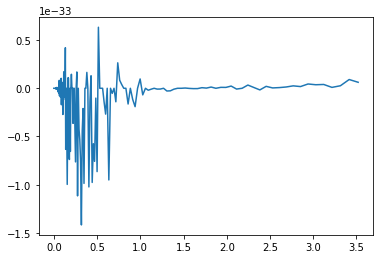

added


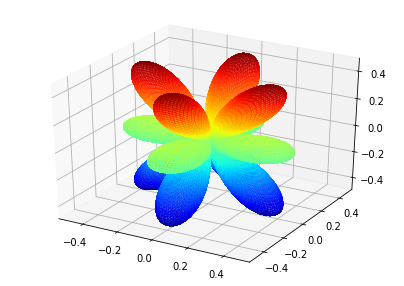

radial part


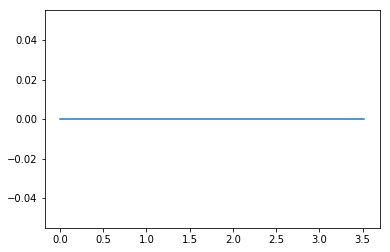

added


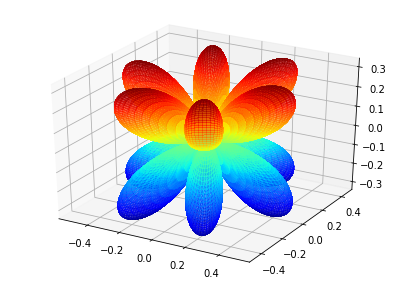

radial part


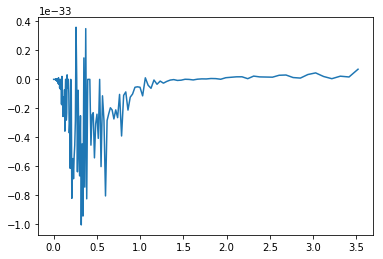

added


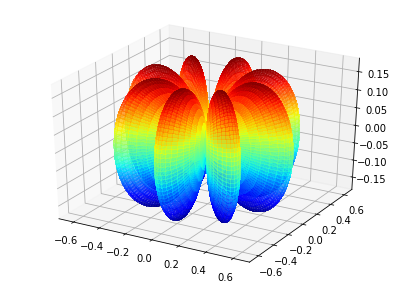

radial part


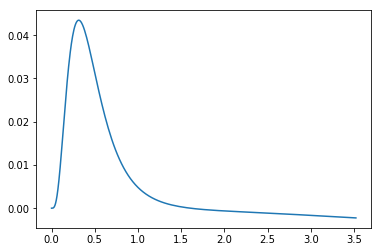

added


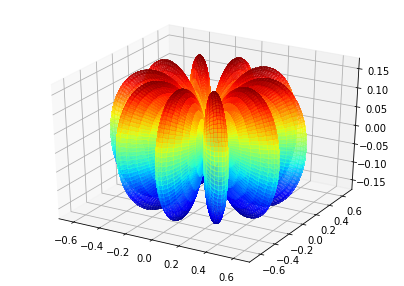

radial part


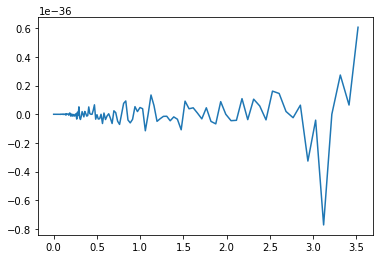

added


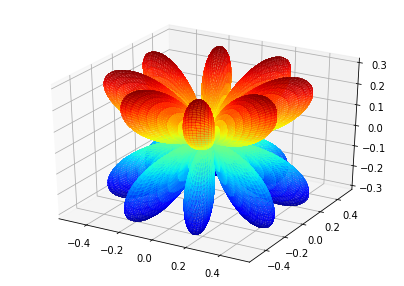

radial part


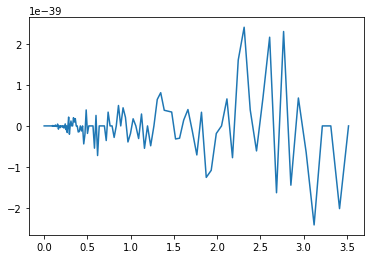

added


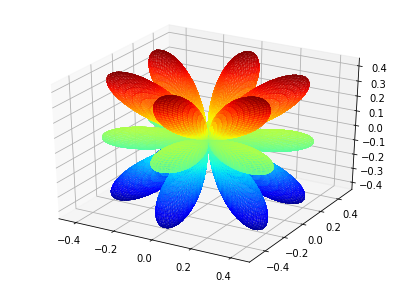

radial part


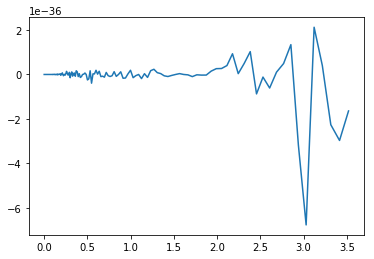

added


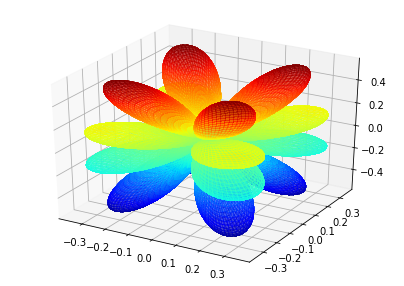

radial part


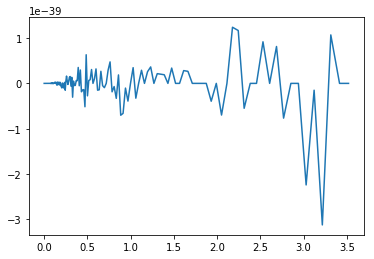

added


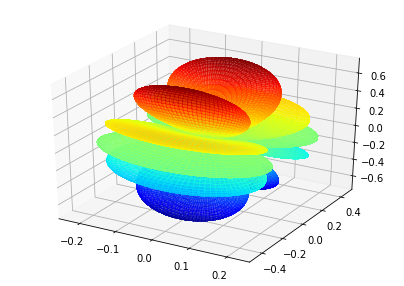

radial part


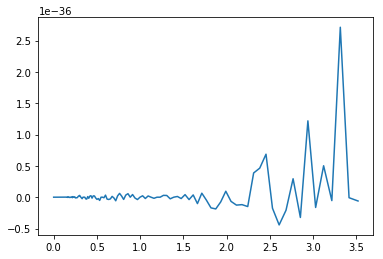

added


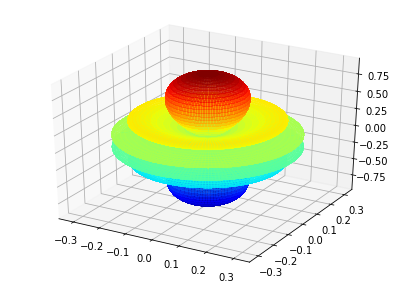

radial part


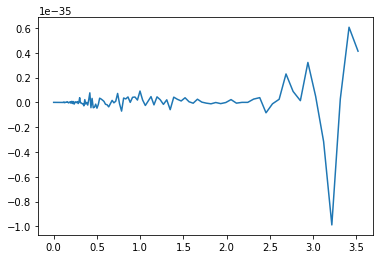

added


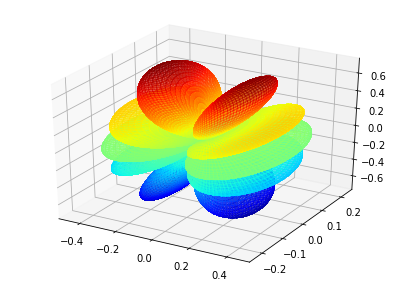

radial part


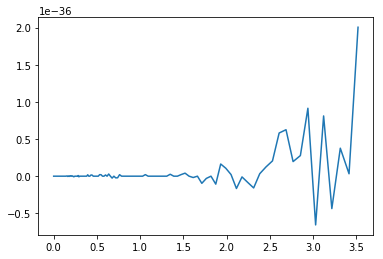

added


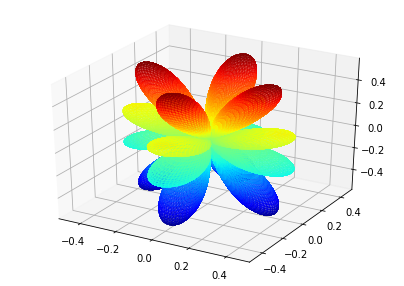

radial part


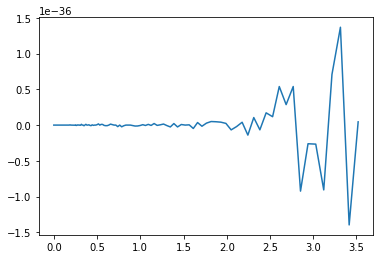

added


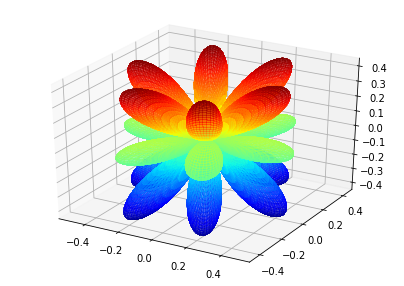

radial part


KeyboardInterrupt: 

In [1058]:
%matplotlib inline
#do the same loops as the fortran program does

nq = 2 #ATOMIC SITE
#neglect the CPA's atomic site index number
nta = 2
ns = 2 #SPIN INDEX
nlmf = 49#number of spherical harmonics used in the expansion

#calculate the value for point in grid as product of coefs and sperical harmonics

theta, phi = np.linspace(0, 2 *np.pi, 164), np.linspace(0, np.pi, 164)
THETA, PHI = np.meshgrid(theta, phi)
R = 0
Ro = 0
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
Xs = R * np.sin(PHI) * np.cos(THETA)
Ys = R * np.sin(PHI) * np.sin(THETA)
Zs = R * np.cos(PHI)


#Loop over atomic sites
for iq in range(1,nq):
    #loop atomic site index
    for ita in range(1,nta):
        #loop spin index
        for iS in range(1,ns):
            #loop the sperical harmonics
            for lm in range(1,nlmf+1):
                R1 = np.abs(real_harm(Lms[lm-1][0],Lms[lm-1][1],PHI,THETA))
                
                X1 = R1 * np.sin(PHI) * np.cos(THETA)
                Y1 = R1 * np.sin(PHI) * np.sin(THETA)
                Z1 = R1 * np.cos(PHI)
                
                fig = plt.figure(figsize=(7, 5))
                ax = fig.add_subplot(1,1,1, projection='3d')
                plot = ax.plot_surface(
                    X1, Y1, Z1, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
                    linewidth=0, antialiased=False, alpha=0.5)
                print('added')
                plt.show()
                
                
                
                
                plt.plot(ri[lm],chdl[lm-1])
                print('radial part')
                plt.show()
                
                
print(np.shape(R))

In [91]:
print(R)

[[0.11203591 0.11203591 0.11203591 ... 0.11203591 0.11203591 0.11203591]
 [0.11203509 0.11203509 0.11203509 ... 0.11203509 0.11203509 0.11203509]
 [0.11203264 0.11203264 0.11203264 ... 0.11203264 0.11203264 0.11203264]
 ...
 [0.11203264 0.11203264 0.11203264 ... 0.11203264 0.11203264 0.11203264]
 [0.11203509 0.11203509 0.11203509 ... 0.11203509 0.11203509 0.11203509]
 [0.11203591 0.11203591 0.11203591 ... 0.11203591 0.11203591 0.11203591]]


(164, 164)


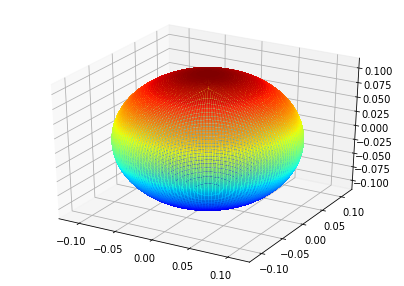

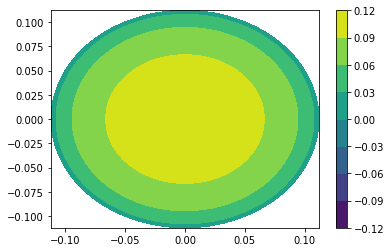

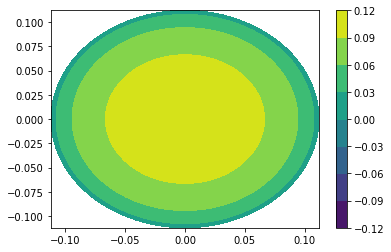

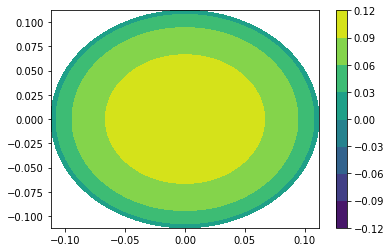

In [94]:
X = Ro * np.sin(PHI) * np.cos(THETA)
Y = Ro * np.sin(PHI) * np.sin(THETA)
Z = Ro * np.cos(PHI)
print(np.shape(Z))
"""
for x in range(len(X)):
    for y in range(len(Y)):
        for z in range(len(Z)):
"""                        
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)

plt.show()
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z)
cbar = fig.colorbar(cs)

plt.show()

fig, ax = plt.subplots()
cs = ax.contourf(X, Z, Y)
cbar = fig.colorbar(cs)

plt.show()

fig, ax = plt.subplots()
cs = ax.contourf(Y, Z, X)
cbar = fig.colorbar(cs)

plt.show()

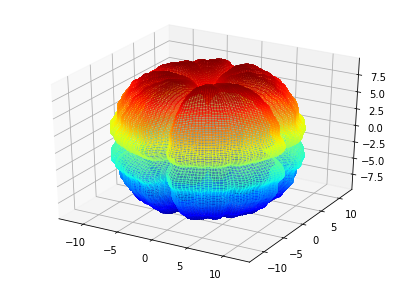

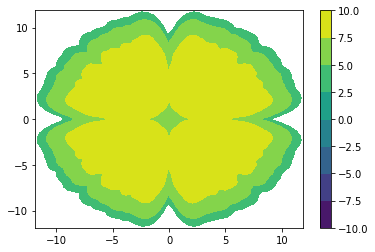

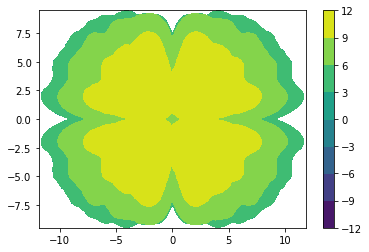

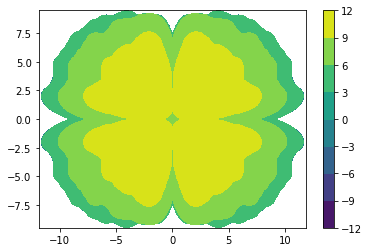

In [85]:
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)


fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    Xs, Ys, Zs, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)

plt.show()

fig, ax = plt.subplots()
cs = ax.contourf(Xs, Ys, Zs)
cbar = fig.colorbar(cs)

plt.show()

fig, ax = plt.subplots()
cs = ax.contourf(Xs, Zs, Ys)
cbar = fig.colorbar(cs)

plt.show()

fig, ax = plt.subplots()
cs = ax.contourf(Ys, Zs, Xs)
cbar = fig.colorbar(cs)

plt.show()

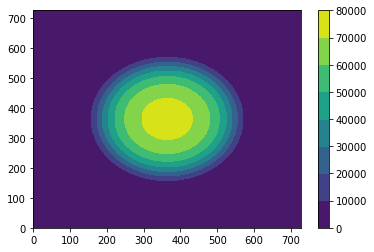

In [470]:
chdlSum = np.zeros(364)
#print(C)
for lm in range(49):
    chdlSum += chdl[lm]

chd0Sum = np.zeros(364)
#print(C)
for lm in range(81):
    chd0Sum += chd0[lm]


grid = np.zeros((364*2,364*2))
#print(grid)
#chdlSum=np.flip(chdlSum,0)
for x in range(-364,364+1):
    for y in range(-364,364+1):
        r = np.sqrt(x**2+y**2)
        if r>=364:
            grid[x-364][y-364] = chd0Sum[363]
        else:
            grid[x-364][y-364] = chd0Sum[int(r)]

          

fig, ax = plt.subplots()
cs = ax.contourf(grid)
cbar = fig.colorbar(cs)

plt.show()


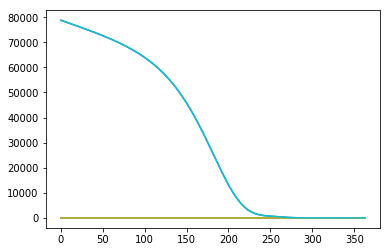

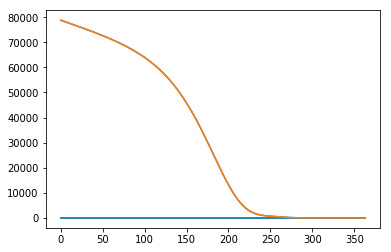

In [471]:
#%matplotlib inline
for lm in range(0,49):
    plt.plot(chdl[lm])
plt.plot(chdlSum)
plt.show()

for lm in range(0,81):
    plt.plot(chd0[lm])
plt.plot(chd0Sum)
plt.show()

In [263]:
def CHDL(lm,R):
    C = R.copy()
    print (C)
    for c in C:
        for ci in c:
            print ('tämä on c :',ci)
            rmax = len(chdl[lm])
            if ci < rmax:
                ci = chdl[lm][int(ci)]
            else:
                ci = chdl[lm][rmax-1]
    return C
def phi(lm,R):
    R*=((R=100)*0+(<100)*0.8)
nq = 1 #ATOMIC SITE
#neglect the CPA's atomic site index number
nta = 1
ns = 1 #SPIN INDEX
nlmf = 2#number of spherical harmonics used in the expansion
x = np.linspace(-364,364,30)
y = np.linspace(-364,364,30)

X,Y = np.meshgrid(x,y)
nmax = 364 #number of mesh point
z = np.zeros((nmax*2,nmax*2))

#Loop over atomic sites
for iq in range(1,nq+1):
    #loop atomic site index
    for ita in range(1,nta+1):
        #loop spin index
        for iS in range(1,ns+1):
            #loop the sperical harmonics
            for lm in range(1,nlmf+1):
                r=(radius(X,Y))
                z[x][y] = CHDL(lm-1,r)*np.abs(real_harm(Lms[lm-1][0],Lms[lm-1][1],Phi(X,Y),0))
print(z)
h = plt.contourf(range(-nmax,nmax),range(-nmax,nmax),z)
plt.show()

[[514.7737367  497.33979609 480.5851764  464.58338003 449.41482893
  435.16666481 421.93213919 409.80946821 398.90003337 389.3058428
  381.12623642 374.45392662 369.37060586 365.94249823 364.21634474
  364.21634474 365.94249823 369.37060586 374.45392662 381.12623642
  389.3058428  398.90003337 409.80946821 421.93213919 435.16666481
  449.41482893 464.58338003 480.5851764  497.33979609 514.7737367 ]
 [497.33979609 479.27209969 461.86251693 445.18826329 429.33502214
  414.39703055 400.47671949 387.68372807 376.13310064 365.94249823
  357.22833154 350.10086537 344.65855167 340.98208865 339.1289114
  339.1289114  340.98208865 344.65855167 350.10086537 357.22833154
  365.94249823 376.13310064 387.68372807 400.47671949 414.39703055
  429.33502214 445.18826329 461.86251693 479.27209969 497.33979609]
 [480.5851764  461.86251693 443.77046268 426.38929252 409.80946821
  394.13213258 379.46915798 365.94249823 353.68255314 342.8252485
  333.5076009  325.86171137 320.00743154 316.04433832 314.04403

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [311]:
nq = 1 #ATOMIC SITE
#neglect the CPA's atomic site index number
nta = 1
ns = 1 #SPIN INDEX
nlmf = 49#number of spherical harmonics used in the expansion
nmax = 64 #number of mesh point
rmax = 364
z = np.zeros((nmax*2,nmax*2))

#Loop over atomic sites
for iq in range(1,nq+1):
    #loop atomic site index
    for ita in range(1,nta+1):
        #loop spin index
        for iS in range(1,ns+1):
            #loop the sperical harmonics
            for lm in range(1,nlmf+1):
                for x in range(nmax*2):
                    X=(x-nmax)/nmax*rmax
                    for y in range(nmax*2):
                        Y=(y-nmax)/nmax*rmax
                        r=radius(X,Y)
                        if r>nmax:
                            r=nmax
                        z[x][y] += chdl[lm-1][int(r)]*np.abs(real_harm(Lms[lm-1][0],Lms[lm-1][1],Phi(X,Y),0))
print(z)

[[7.29393107 7.29393107 7.29393107 ... 7.29393107 7.29393107 7.29393107]
 [7.29393107 7.29393107 7.29393107 ... 7.29393107 7.29393107 7.29393107]
 [7.29393107 7.29393107 7.29393107 ... 7.29393107 7.29393107 7.29393107]
 ...
 [7.29393107 7.29393107 7.29393107 ... 7.29393107 7.29393107 7.29393107]
 [7.29393107 7.29393107 7.29393107 ... 7.29393107 7.29393107 7.29393107]
 [7.29393107 7.29393107 7.29393107 ... 7.29393107 7.29393107 7.29393107]]


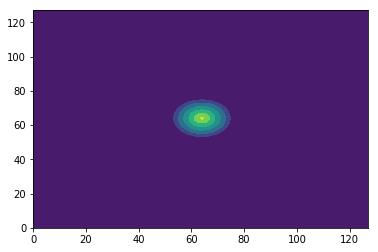

In [312]:
plt.contourf(z)
plt.show()

<IPython.core.display.Javascript object>


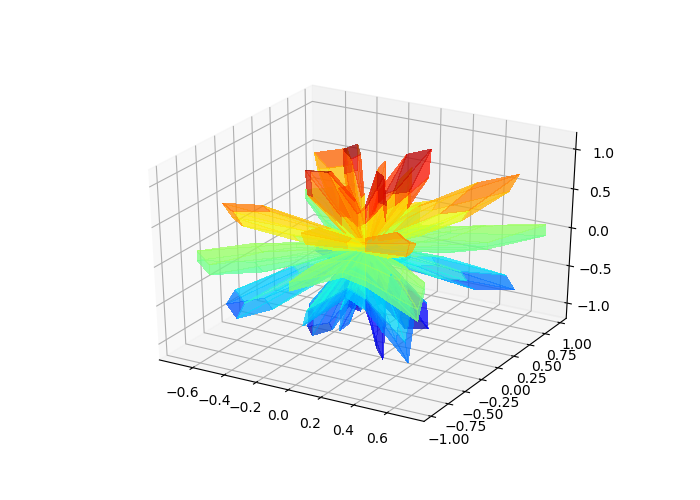

<IPython.core.display.Javascript object>


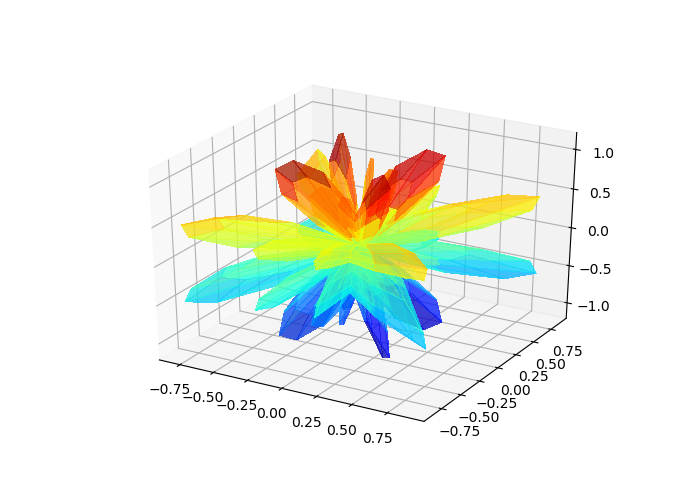

<IPython.core.display.Javascript object>


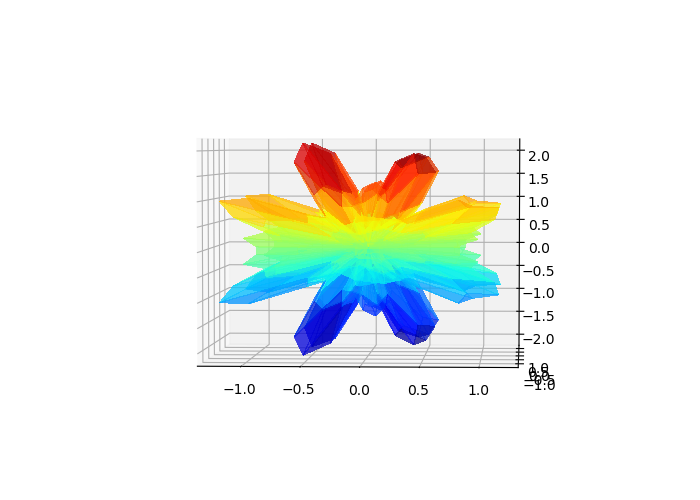

<IPython.core.display.Javascript object>


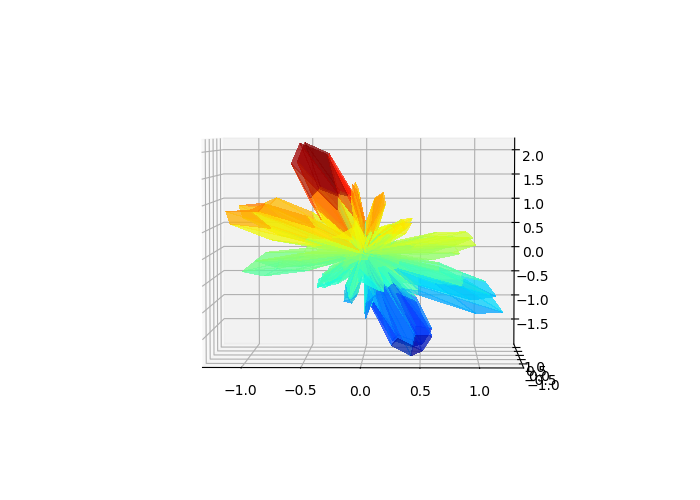

In [59]:
%matplotlib notebook
theta, phi = np.linspace(0, 2 * np.pi, 28), np.linspace(0, np.pi, 28)
THETA, PHI = np.meshgrid(theta, phi)
Rp = np.abs(real_harm(7,-5,THETA,PHI))
X = Rp * np.sin(PHI) * np.cos(THETA)
Y = Rp * np.sin(PHI) * np.sin(THETA)
Z = Rp * np.cos(PHI) 
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)

plt.show()


theta, phi = np.linspace(0, 2 * np.pi, 28), np.linspace(0, np.pi, 28)
THETA, PHI = np.meshgrid(theta, phi)
Rp = np.abs(real_harm(7,-4,THETA,PHI))
X = Rp * np.sin(PHI) * np.cos(THETA)
Y = Rp * np.sin(PHI) * np.sin(THETA)
Z = Rp * np.cos(PHI) 
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)

plt.show()

theta, phi = np.linspace(0, 2 * np.pi, 28), np.linspace(0, np.pi, 28)
THETA, PHI = np.meshgrid(theta, phi)
Rp = np.abs(real_harm(7,-5,THETA,PHI))+np.abs(real_harm(7,-4,THETA,PHI))
X = Rp * np.sin(PHI) * np.cos(THETA)
Y = Rp * np.sin(PHI) * np.sin(THETA)
Z = Rp * np.cos(PHI) 
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)

plt.show()

theta, phi = np.linspace(0, 2 * np.pi, 28), np.linspace(0, np.pi, 28)
THETA, PHI = np.meshgrid(theta, phi)
Rp = real_harm(7,-5,THETA,PHI)-real_harm(7,-4,THETA,PHI)
X = Rp * np.sin(PHI) * np.cos(THETA)
Y = Rp * np.sin(PHI) * np.sin(THETA)
Z = Rp * np.cos(PHI) 
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)

plt.show()

-4.0 -4.0 -4.0
-4.0 -3.5 -3.5
-4.0 -3.0 -3.0
-4.0 -2.5 -2.5
-4.0 -2.0 -2.0
-4.0 -1.5 -1.5
-4.0 -1.0 -1.0
-4.0 -0.5 -0.5
-3.5 -4.0 -3.5
-3.5 -3.5 -3.0
-3.5 -3.0 -2.5
-3.5 -2.5 -2.0
-3.5 -2.0 -1.5
-3.5 -1.5 -1.0
-3.5 -1.0 -0.5
-3.5 -0.5 0.0
-3.0 -4.0 -3.0
-3.0 -3.5 -2.5
-3.0 -3.0 -2.0
-3.0 -2.5 -1.5
-3.0 -2.0 -1.0
-3.0 -1.5 -0.5
-3.0 -1.0 0.0
-3.0 -0.5 0.5
-2.5 -4.0 -2.5
-2.5 -3.5 -2.0
-2.5 -3.0 -1.5
-2.5 -2.5 -1.0
-2.5 -2.0 -0.5
-2.5 -1.5 0.0
-2.5 -1.0 0.5
-2.5 -0.5 1.0
-2.0 -4.0 -2.0
-2.0 -3.5 -1.5
-2.0 -3.0 -1.0
-2.0 -2.5 -0.5
-2.0 -2.0 0.0
-2.0 -1.5 0.5
-2.0 -1.0 1.0
-2.0 -0.5 1.5
-1.5 -4.0 -1.5
-1.5 -3.5 -1.0
-1.5 -3.0 -0.5
-1.5 -2.5 0.0
-1.5 -2.0 0.5
-1.5 -1.5 1.0
-1.5 -1.0 1.5
-1.5 -0.5 2.0
-1.0 -4.0 -1.0
-1.0 -3.5 -0.5
-1.0 -3.0 0.0
-1.0 -2.5 0.5
-1.0 -2.0 1.0
-1.0 -1.5 1.5
-1.0 -1.0 2.0
-1.0 -0.5 2.5
-0.5 -4.0 -0.5
-0.5 -3.5 0.0
-0.5 -3.0 0.5
-0.5 -2.5 1.0
-0.5 -2.0 1.5
-0.5 -1.5 2.0
-0.5 -1.0 2.5
-0.5 -0.5 3.0
-3.5 -3.5 -4.0
-3.5 -3.0 -3.5
-3.5 -2.5 -3.0
-3.5 -2.0 -2.5
-3.5 -1.

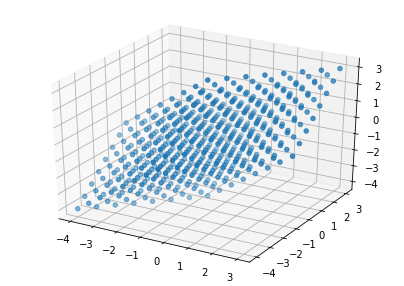

<function matplotlib.pyplot.show(*args, **kw)>

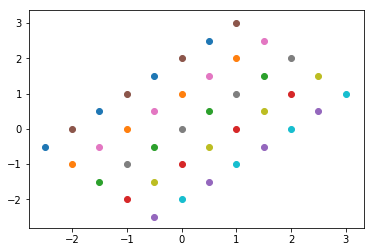

In [592]:
#bilding the lattice

#lattice vector cofactor approximeatly 2*SWS
ac=2*2.8 #rough approximation that has to be changed 

#lattice vectors
a1 = 0.5*np.array([1,1,0])
a2 = 0.5*np.array([1,0,1])
a3 = 0.5*np.array([0,1,1])
xs = []
ys = []
zs = []
plotgrid = np.zeros((20,20,20))
for x in range(-4,4):
    for y in range(-4,4):
        for z in range(-4,4):
            xs.append(x*a1[0]+y*a2[0]+z*a3[0]) 
            ys.append(x*a1[1]+y*a2[1]+z*a3[1])
            zs.append(x*a1[2]+y*a2[2]+z*a3[2])
for i in range(8*8*8):
    print(xs[i], ys[i], zs[i])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.scatter(xs,ys,zs)#ax.plot_surface(range(20),range(20),plotgrid, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),linewidth=0, antialiased=False, alpha=0.5)

plt.show()
for i in range(8*8*8):
    if zs[i]==1:
        plt.scatter(xs[i],ys[i])
plt.show



-20 0
-18 -2
-16 -4
-14 -6
-12 -8
-10 -10
-8 -12
-6 -14
-4 -16
-2 -18
-18 2
-16 0
-14 -2
-12 -4
-10 -6
-8 -8
-6 -10
-4 -12
-2 -14
0 -16
-16 4
-14 2
-12 0
-10 -2
-8 -4
-6 -6
-4 -8
-2 -10
0 -12
2 -14
-14 6
-12 4
-10 2
-8 0
-6 -2
-4 -4
-2 -6
0 -8
2 -10
4 -12
-12 8
-10 6
-8 4
-6 2
-4 0
-2 -2
0 -4
2 -6
4 -8
6 -10
-10 10
-8 8
-6 6
-4 4
-2 2
0 0
2 -2
4 -4
6 -6
8 -8
-8 12
-6 10
-4 8
-2 6


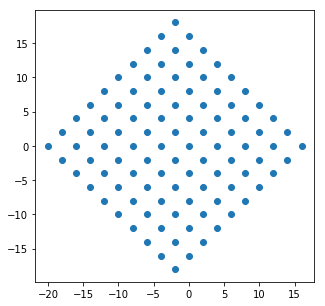

In [654]:
#bilding the lattice

#lattice vector cofactor approximeatly 2*SWS
ac=2*2.8 #rough approximation that has to be changed 

#lattice vectors
a1 = 2*np.array([1,1])
a2 = 2*np.array([1,-1])
xs = []
ys = []
for x in range(-5,5):
    for y in range(-5,5):
        xs.append(x*a1[0]+y*a2[0]) 
        ys.append(x*a1[1]+y*a2[1])
for i in range(8*8):
    for j in range(8*8):
        if True:
            if xs[i]==xs[j] and ys[i]==ys[j]:
                print(xs[i], ys[i])
                
                #print(i,j)

#print (plotgrid)

#fig = plt.figure(figsize=(7, 5))
#ax = fig.add_subplot(1,1,1, projection='3d')
#plot = ax.scatter(xs,ys,zs)#ax.plot_surface(range(20),range(20),plotgrid, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),linewidth=0, antialiased=False, alpha=0.5)



In [643]:
rs = []
for i in range(len(xs)):
    rs.append((xs[i]**2+ ys[i]**2))

In [644]:
print (np.sort(np.array(rs)))
unique, counts = np.unique(rs, return_counts=True)
dict(zip(unique, counts))

[     0      8      8 ... 158408 158408 160000]


{0: 1,
 8: 4,
 16: 4,
 32: 4,
 40: 8,
 64: 4,
 72: 4,
 80: 8,
 104: 8,
 128: 4,
 136: 8,
 144: 4,
 160: 8,
 200: 12,
 208: 8,
 232: 8,
 256: 4,
 272: 8,
 288: 4,
 296: 8,
 320: 8,
 328: 8,
 360: 8,
 392: 4,
 400: 12,
 416: 8,
 424: 8,
 464: 8,
 488: 8,
 512: 4,
 520: 16,
 544: 8,
 576: 4,
 584: 8,
 592: 8,
 640: 8,
 648: 4,
 656: 8,
 680: 16,
 712: 8,
 720: 8,
 776: 8,
 784: 4,
 800: 12,
 808: 8,
 832: 8,
 848: 8,
 872: 8,
 904: 8,
 928: 8,
 936: 8,
 968: 4,
 976: 8,
 1000: 16,
 1024: 4,
 1040: 16,
 1088: 8,
 1096: 8,
 1152: 4,
 1160: 16,
 1168: 8,
 1184: 8,
 1192: 8,
 1224: 8,
 1256: 8,
 1280: 8,
 1296: 4,
 1312: 8,
 1352: 12,
 1360: 16,
 1384: 8,
 1424: 8,
 1440: 8,
 1448: 8,
 1480: 16,
 1544: 8,
 1552: 8,
 1568: 4,
 1576: 8,
 1600: 12,
 1616: 8,
 1640: 16,
 1664: 8,
 1696: 8,
 1744: 8,
 1768: 16,
 1800: 12,
 1808: 8,
 1832: 8,
 1856: 8,
 1864: 8,
 1872: 8,
 1928: 8,
 1936: 4,
 1952: 8,
 1960: 8,
 2000: 16,
 2048: 4,
 2056: 8,
 2080: 16,
 2088: 8,
 2120: 16,
 2152: 8,
 2176: 8,
 2192

In [589]:
from __future__ import division
from vpython import sphere,color

L = 5
R = 0.3
a1 = 0.5*vector(1,1,0)
a2 = 0.5*vector(1,0,1)
a3 = 0.5*vector(0,1,1)
even = []
odd = []


for i in range(-L,L):
    for j in range(-L,L):
        for k in range(-L,L):
            sphere(pos=a1*i+a2*j+a3*k,radius=R,color=color.green)


In [872]:
np.dot([500,500],[500,500])

500000